Figure 1 from "Burden of copy number variation across 1,893 phenotypes in UK Biobank". Descriptions of each sub-part of the figure are below.

a. Histogram of CNV log-length.

b. QQ of CNV AC and number of CNV achieving that AC

c. Histogram of CNV burden per individual

d. Histogram of CNV burden (base-pairs) per individual

e. Manhattan-like plot of CNV burden across chromosomes

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import *
from matplotlib import font_manager as fm, pyplot as plt, rcParams, patches
import seaborn as sns
helv=fm.FontProperties(fname='helvetica.ttf')
plt.style.use('seaborn-colorblind')

In [2]:
# import data
data = pd.read_table('/oak/stanford/groups/jpriest/cnv_ukb/all.cnv')
data['LEN'] = data['BP2'] - data['BP1'] + 1
data['CNV'] = data['CHR'].map(str) + ':'    \
              + data['BP1'].map(str) + '-'  \
              + data['BP2'].map(str) + '_'  \
              + data['TYPE'].map(str)

# individual CNV counts
cnvN  = data['IID'].value_counts().tolist() + \
          [0 for _ in range(32764)] # magic number: people called w/o cnv
cnvN_dict = data['IID'].value_counts().to_dict()
cnvN_filtering_dict = dict(filter(lambda x:x[1] < 31, cnvN_dict.items()))
    
data = data[data['IID'].isin(cnvN_filtering_dict.keys())]
data.index = list(range(data.shape[0]))

# individual CNV BP counts
cnvBP, row, iid = {data.iloc[0,1]:0}, 0, data.iloc[0,1]
while row < data.shape[0]:
    if data.loc[row,'IID'] != iid:
        iid = data.loc[row,'IID']
        cnvBP[iid] = 0
    cnvBP[iid] += data.loc[row,'LEN']
    row += 1


In [3]:
cnv_data = data.drop_duplicates('CNV').drop(['FID','IID'], axis=1)
cnv_data = cnv_data.sort_values(by='CNV')
# this returns (1,421693) so we know the sorted values are the same
# pd.DataFrame(np.vstack((cnv_data['CNV'].values, data['CNV'].value_counts().sort_index().index.values))).drop_duplicates().shape
cnv_data['AC'] = data['CNV'].value_counts().sort_index().values
cnv_data.head(10)


,CHR,BP1,BP2,TYPE,SCORE,SITES,LEN,CNV,AC
902049,10,100004799,100079373,1,0,74575,74575,10:100004799-100079373_1,1
884006,10,100011120,100105182,1,0,94063,94063,10:100011120-100105182_1,1
922325,10,100015474,100411409,1,0,395936,395936,10:100015474-100411409_1,1
850116,10,100015474,100508921,1,0,493448,493448,10:100015474-100508921_1,4
896295,10,100015474,100522440,1,0,506967,506967,10:100015474-100522440_1,1
885191,10,100016196,100508921,1,0,492726,492726,10:100016196-100508921_1,1
886992,10,100017415,100508921,1,0,491507,491507,10:100017415-100508921_1,1
859467,10,100043981,100074525,1,0,30545,30545,10:100043981-100074525_1,2
893465,10,100046035,100074525,1,0,28491,28491,10:100046035-100074525_1,1
861400,10,10006344,10057699,1,0,51356,51356,10:10006344-10057699_1,1


In [4]:
bands = pd.read_table('cytoBand.txt.gz', header=None, names=['chr', 'bp1', 'bp2', 'band', 'pm'])
bands['chrom'] = bands['chr'].apply(lambda x: int(x.replace('chr','')) if all((i not in x for i in 'XY')) else '23')
bands = bands.sort_values(['chrom', 'bp1']).reset_index()
bands.head(75)

,index,chr,bp1,bp2,band,pm,chrom
0,0,chr1,0,2300000,p36.33,gneg,1
1,1,chr1,2300000,5400000,p36.32,gpos25,1
2,2,chr1,5400000,7200000,p36.31,gneg,1
3,3,chr1,7200000,9200000,p36.23,gpos25,1
4,4,chr1,9200000,12700000,p36.22,gneg,1
5,5,chr1,12700000,16200000,p36.21,gpos50,1
6,6,chr1,16200000,20400000,p36.13,gneg,1
7,7,chr1,20400000,23900000,p36.12,gpos25,1
8,8,chr1,23900000,28000000,p36.11,gneg,1
9,9,chr1,28000000,30200000,p35.3,gpos25,1


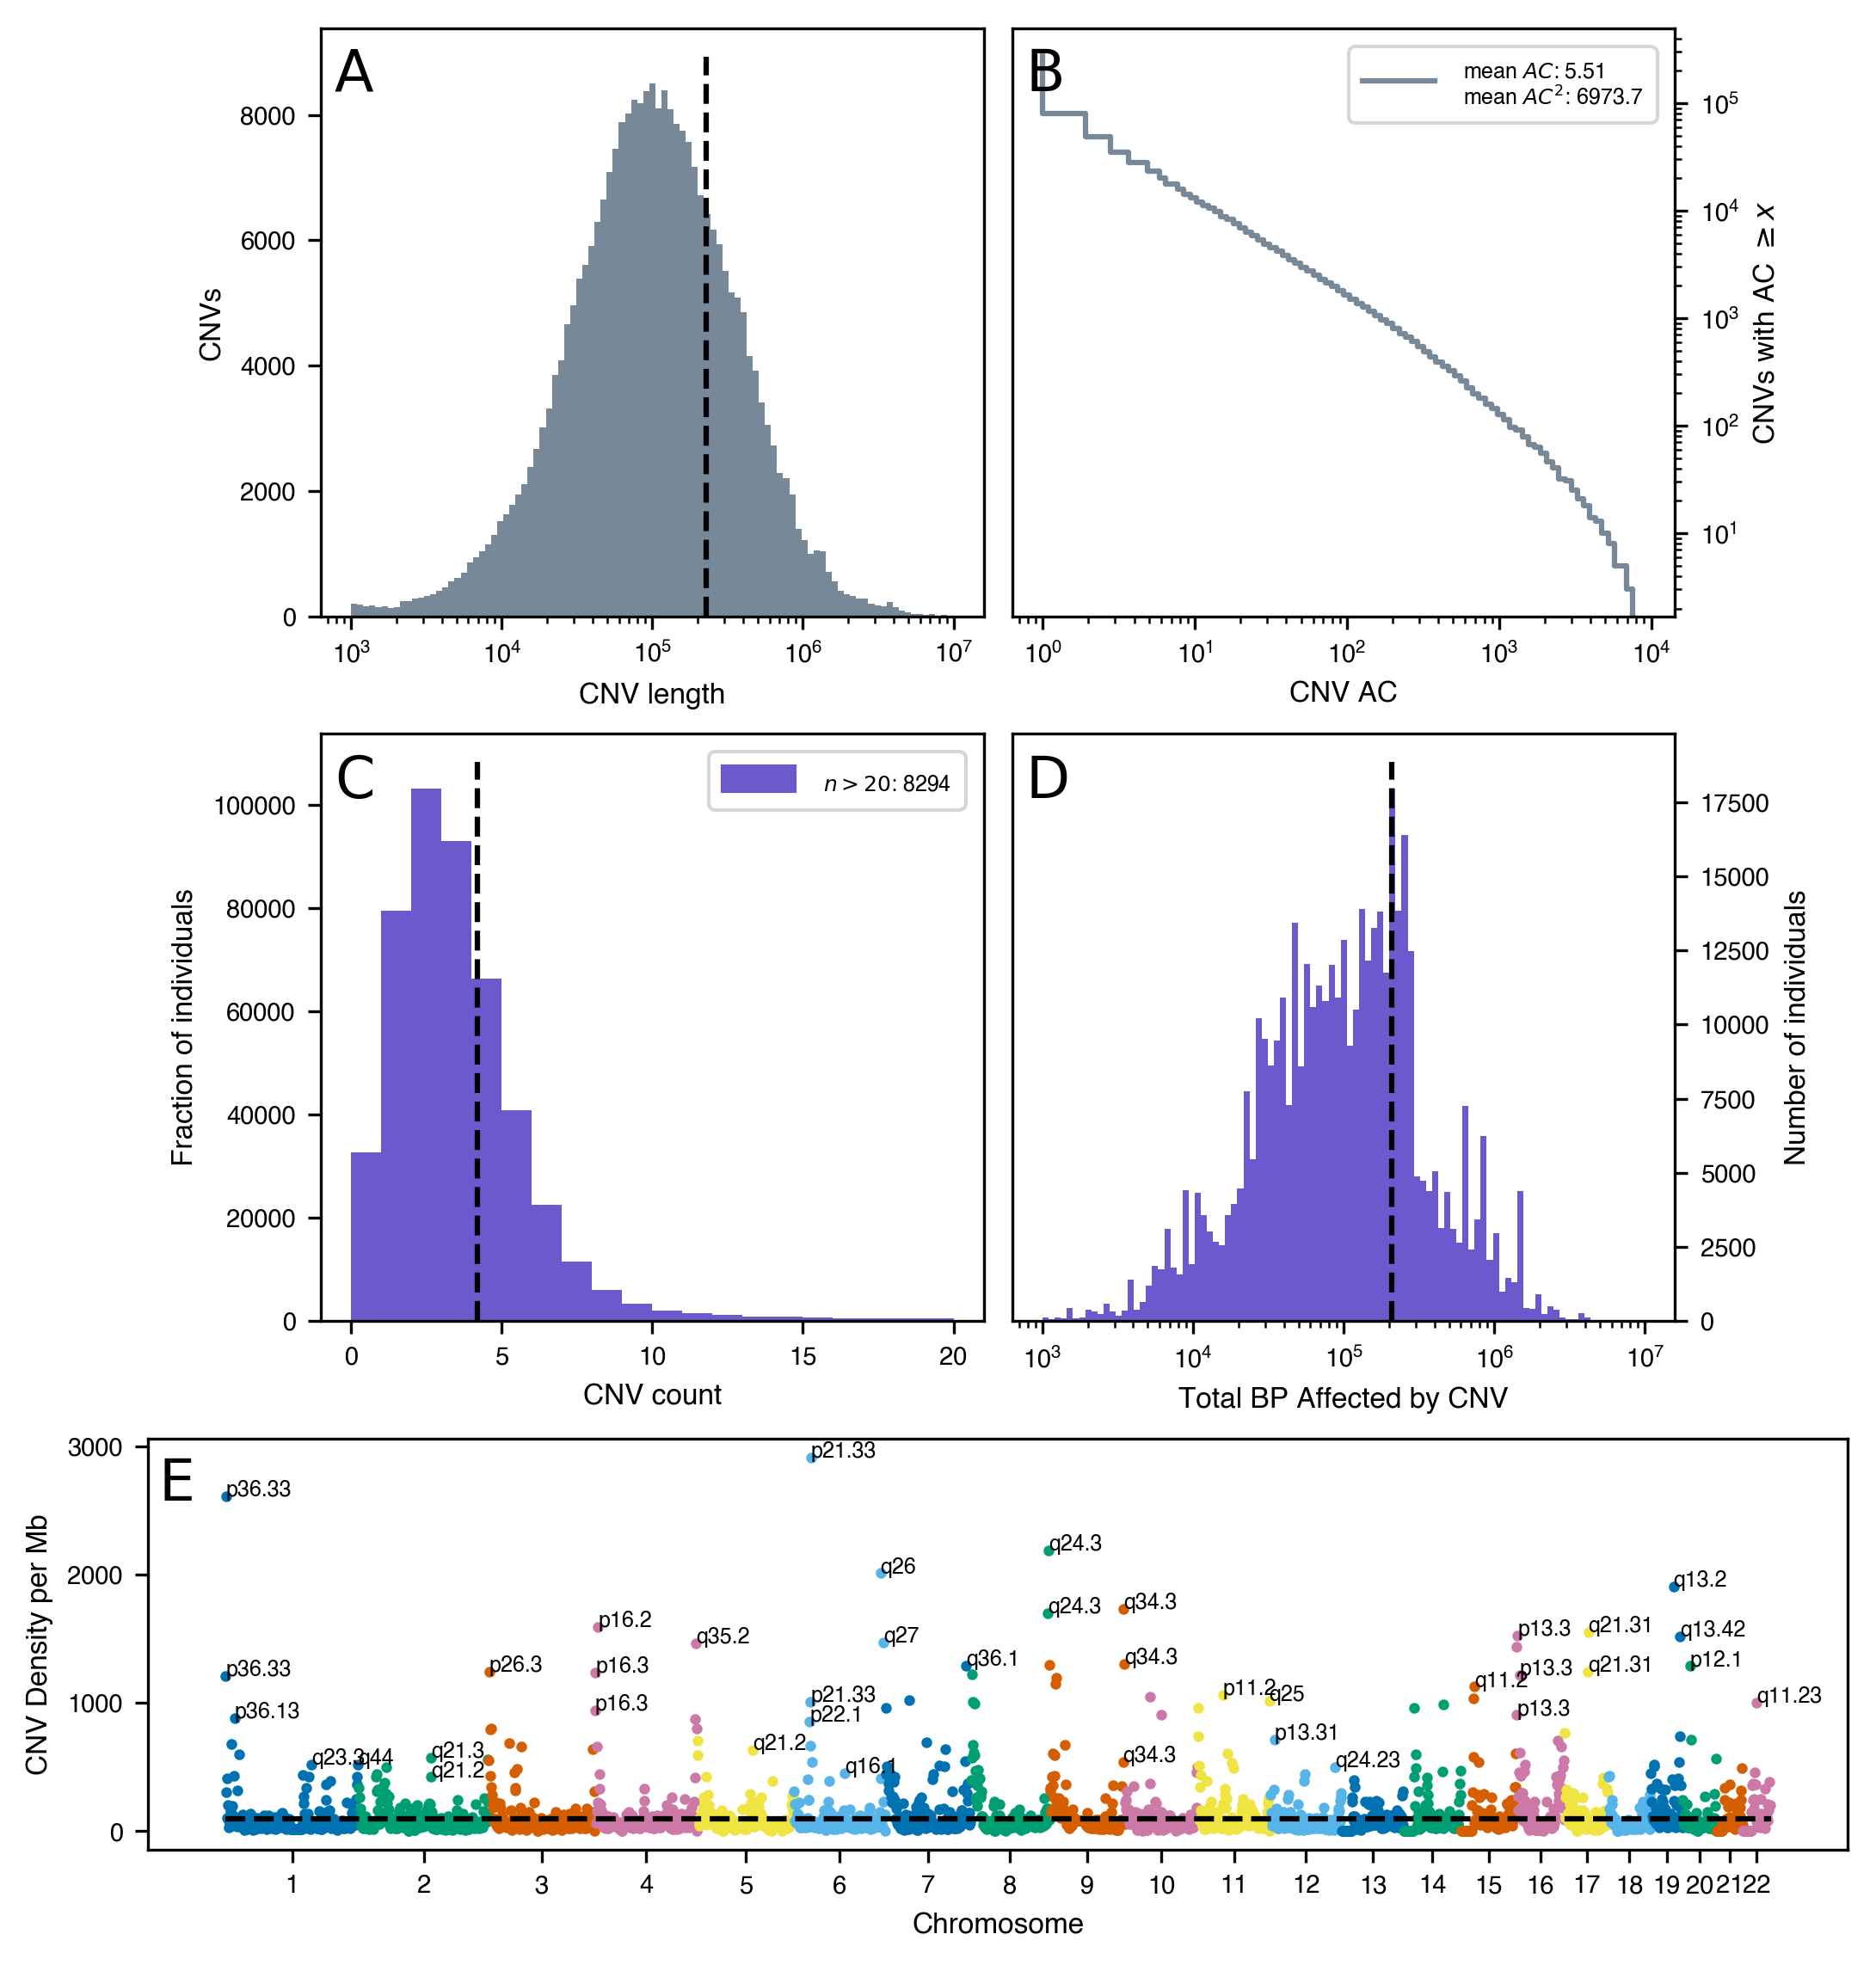

In [5]:
# take a stab at it!
frac = 8.5/10
fig  = plt.figure(figsize=(10*frac,11*frac), dpi=300)
grid = plt.GridSpec(11,10,hspace=2)

# A: CNV log-length
fig.add_subplot(grid[:4,1:5])
plt.hist(cnv_data['LEN'].values, bins=np.logspace(np.log10(1e3),np.log10(1e7), 100), 
         color='lightslategrey') # 1kb to 10Mb
plt.gca().set_xscale("log")
plt.plot([cnv_data['LEN'].mean() for _ in range(2)], plt.ylim(), 'k--')
plt.ylabel('CNVs', fontsize=8, fontproperties=helv)
plt.xlabel('CNV length', fontsize=8, fontproperties=helv)
plt.xticks(fontsize=7, fontproperties=helv)
plt.yticks(fontsize=7, fontproperties=helv)

# B: CNV AC
fig.add_subplot(grid[:4,5:-1])
values,bins = np.histogram(cnv_data['AC'].values, bins=np.logspace(np.log10(1e0),np.log10(1e4), 100))
plt.step(bins[:-1], np.cumsum(values[::-1])[::-1], color='lightslategrey') # len <= x
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.ylabel('CNVs with AC $\geq x$', fontsize=8, fontproperties=helv)
plt.xlabel('CNV AC', fontsize=8, fontproperties=helv)
plt.legend(['mean ' + '$AC$' + ': {:.2f}'.format(cnv_data['AC'].mean()) + 
            '\nmean ' + '${AC}^2$' + ': {:.1f}'.format((cnv_data['AC']**2).mean())],
           prop=helv, fontsize=8)
plt.xticks(fontsize=7, fontproperties=helv)
plt.yticks(fontsize=7, fontproperties=helv)

# C: CNV N burden
fig.add_subplot(grid[4:8,1:5])
plt.hist(filter(lambda x: x < 21, map(lambda i:i + 0.5, cnvN)), bins=list(range(21)), color='slateblue')
plt.plot([np.mean(cnvN) for _ in range(2)], plt.ylim(), 'k--')
plt.xlabel('CNV count', fontsize=8, fontproperties=helv)
plt.ylabel('Fraction of individuals', fontsize=8, fontproperties=helv)
plt.legend([patches.Patch(color='slateblue')], 
           ['$n>20$: ' + str(sum([x > 20 for x in cnvN]))],
           prop=helv, fontsize=8)
plt.xticks(fontsize=7, fontproperties=helv)
plt.yticks(fontsize=7, fontproperties=helv)
   
# D: CNV log-BP burden
fig.add_subplot(grid[4:8,5:-1])
plt.hist(cnvBP.values(), bins=np.logspace(np.log10(1e3),np.log10(1e7), 100), color='slateblue')
plt.plot([np.mean(cnvBP.values()) for _ in range(2)], plt.ylim(), 'k--')
plt.gca().set_xscale("log")
plt.ylabel('Number of individuals', fontsize=8, fontproperties=helv)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel('Total BP Affected by CNV', fontsize=8, fontproperties=helv)
plt.xticks(fontsize=7, fontproperties=helv)
plt.yticks(fontsize=7, fontproperties=helv)

# E: CNV density
fig.add_subplot(grid[8:,:])
binsize = 1e6 # 1 Mb
chrsize = {'1': 249250621,
           '2': 243199373,
           '3': 198022430,
           '4': 191154276,
           '5': 180915260,
           '6': 171115067,
           '7': 159138663,
           'X': 155270560,
           '8': 146364022,
           '9': 141213431,
           '10':135534747,
           '11':135006516,
           '12':133851895,
           '13':115169878,
           '14':107349540,
           '15':102531392,
           '16':90354753,
           '17':81195210,
           '18':78077248,
           '20':63025520,
           'Y': 59373566,
           '19':59128983,
           '22':51304566,
           '21':48129895}

counts_by_bin = []
counts_by_chr = []
bin_to_band = []
band_ix = 0
for c in range(1,23):
    bin_ix = 0
    while bin_ix * binsize < chrsize[str(c)]:
        counts_by_bin.append(cnv_data[(cnv_data['CHR'] == c) & 
                                      (cnv_data['BP2'] > (bin_ix * binsize)) & 
                                      (cnv_data['BP1'] < ((bin_ix + 1)*binsize))].shape[0])
        while (bin_ix * binsize) >= int(bands.loc[band_ix,'bp2']) + binsize/2:
            band_ix += 1
        bin_to_band.append(bands.loc[band_ix, 'band'])
        bin_ix += 1
    band_ix += 1
    counts_by_chr.append(bin_ix)
    

chr_ixs = np.cumsum([0]+counts_by_chr)
# plot the points
for c in range(22):
    plt.plot(list(range(chr_ixs[c], chr_ixs[c+1])), counts_by_bin[chr_ixs[c]:chr_ixs[c+1]], '.', ms=4)
plt.plot([0, chr_ixs[-1]],[cnv_data.shape[0]/chr_ixs[-1], cnv_data.shape[0]/chr_ixs[-1]], 'k--')

plt.xticks([chr_ixs[c] + (chr_ixs[c+1]-chr_ixs[c])/2 for c in range(len(counts_by_chr))],
           [str(c+1) for c in range(len(counts_by_chr))], fontsize=7, fontproperties=helv)
plt.yticks(fontsize=7, fontproperties=helv)
plt.xlabel('Chromosome', fontsize=8, fontproperties=helv)
plt.ylabel('CNV Density per Mb', fontsize=8, fontproperties=helv)

# add labels
for n in range(len(bin_to_band)):
    if counts_by_bin[n] > 400 and (all([abs(counts_by_bin[n] - counts_by_bin[i]) > 150 
                                            for i in range(max(n-59,0),min(len(bin_to_band), n+60)) if n != i])
                                   or all([counts_by_bin[n] >= counts_by_bin[i] 
                                            for i in range(max(0,n-59),min(len(bin_to_band), n+60))])): 
        plt.annotate(bin_to_band[n], [n, counts_by_bin[n]], fontsize=6, fontproperties=helv)

# figure labels 
fig.text(0.21, 0.854, 'A', fontsize='16')
fig.text(0.525, 0.854, 'B', fontsize='16')
fig.text(0.21, 0.561, 'C', fontsize='16')
fig.text(0.525, 0.561, 'D', fontsize='16')
fig.text(0.13, 0.27, 'E', fontsize='16')
plt.savefig('output/Figure1.pdf')
plt.show()

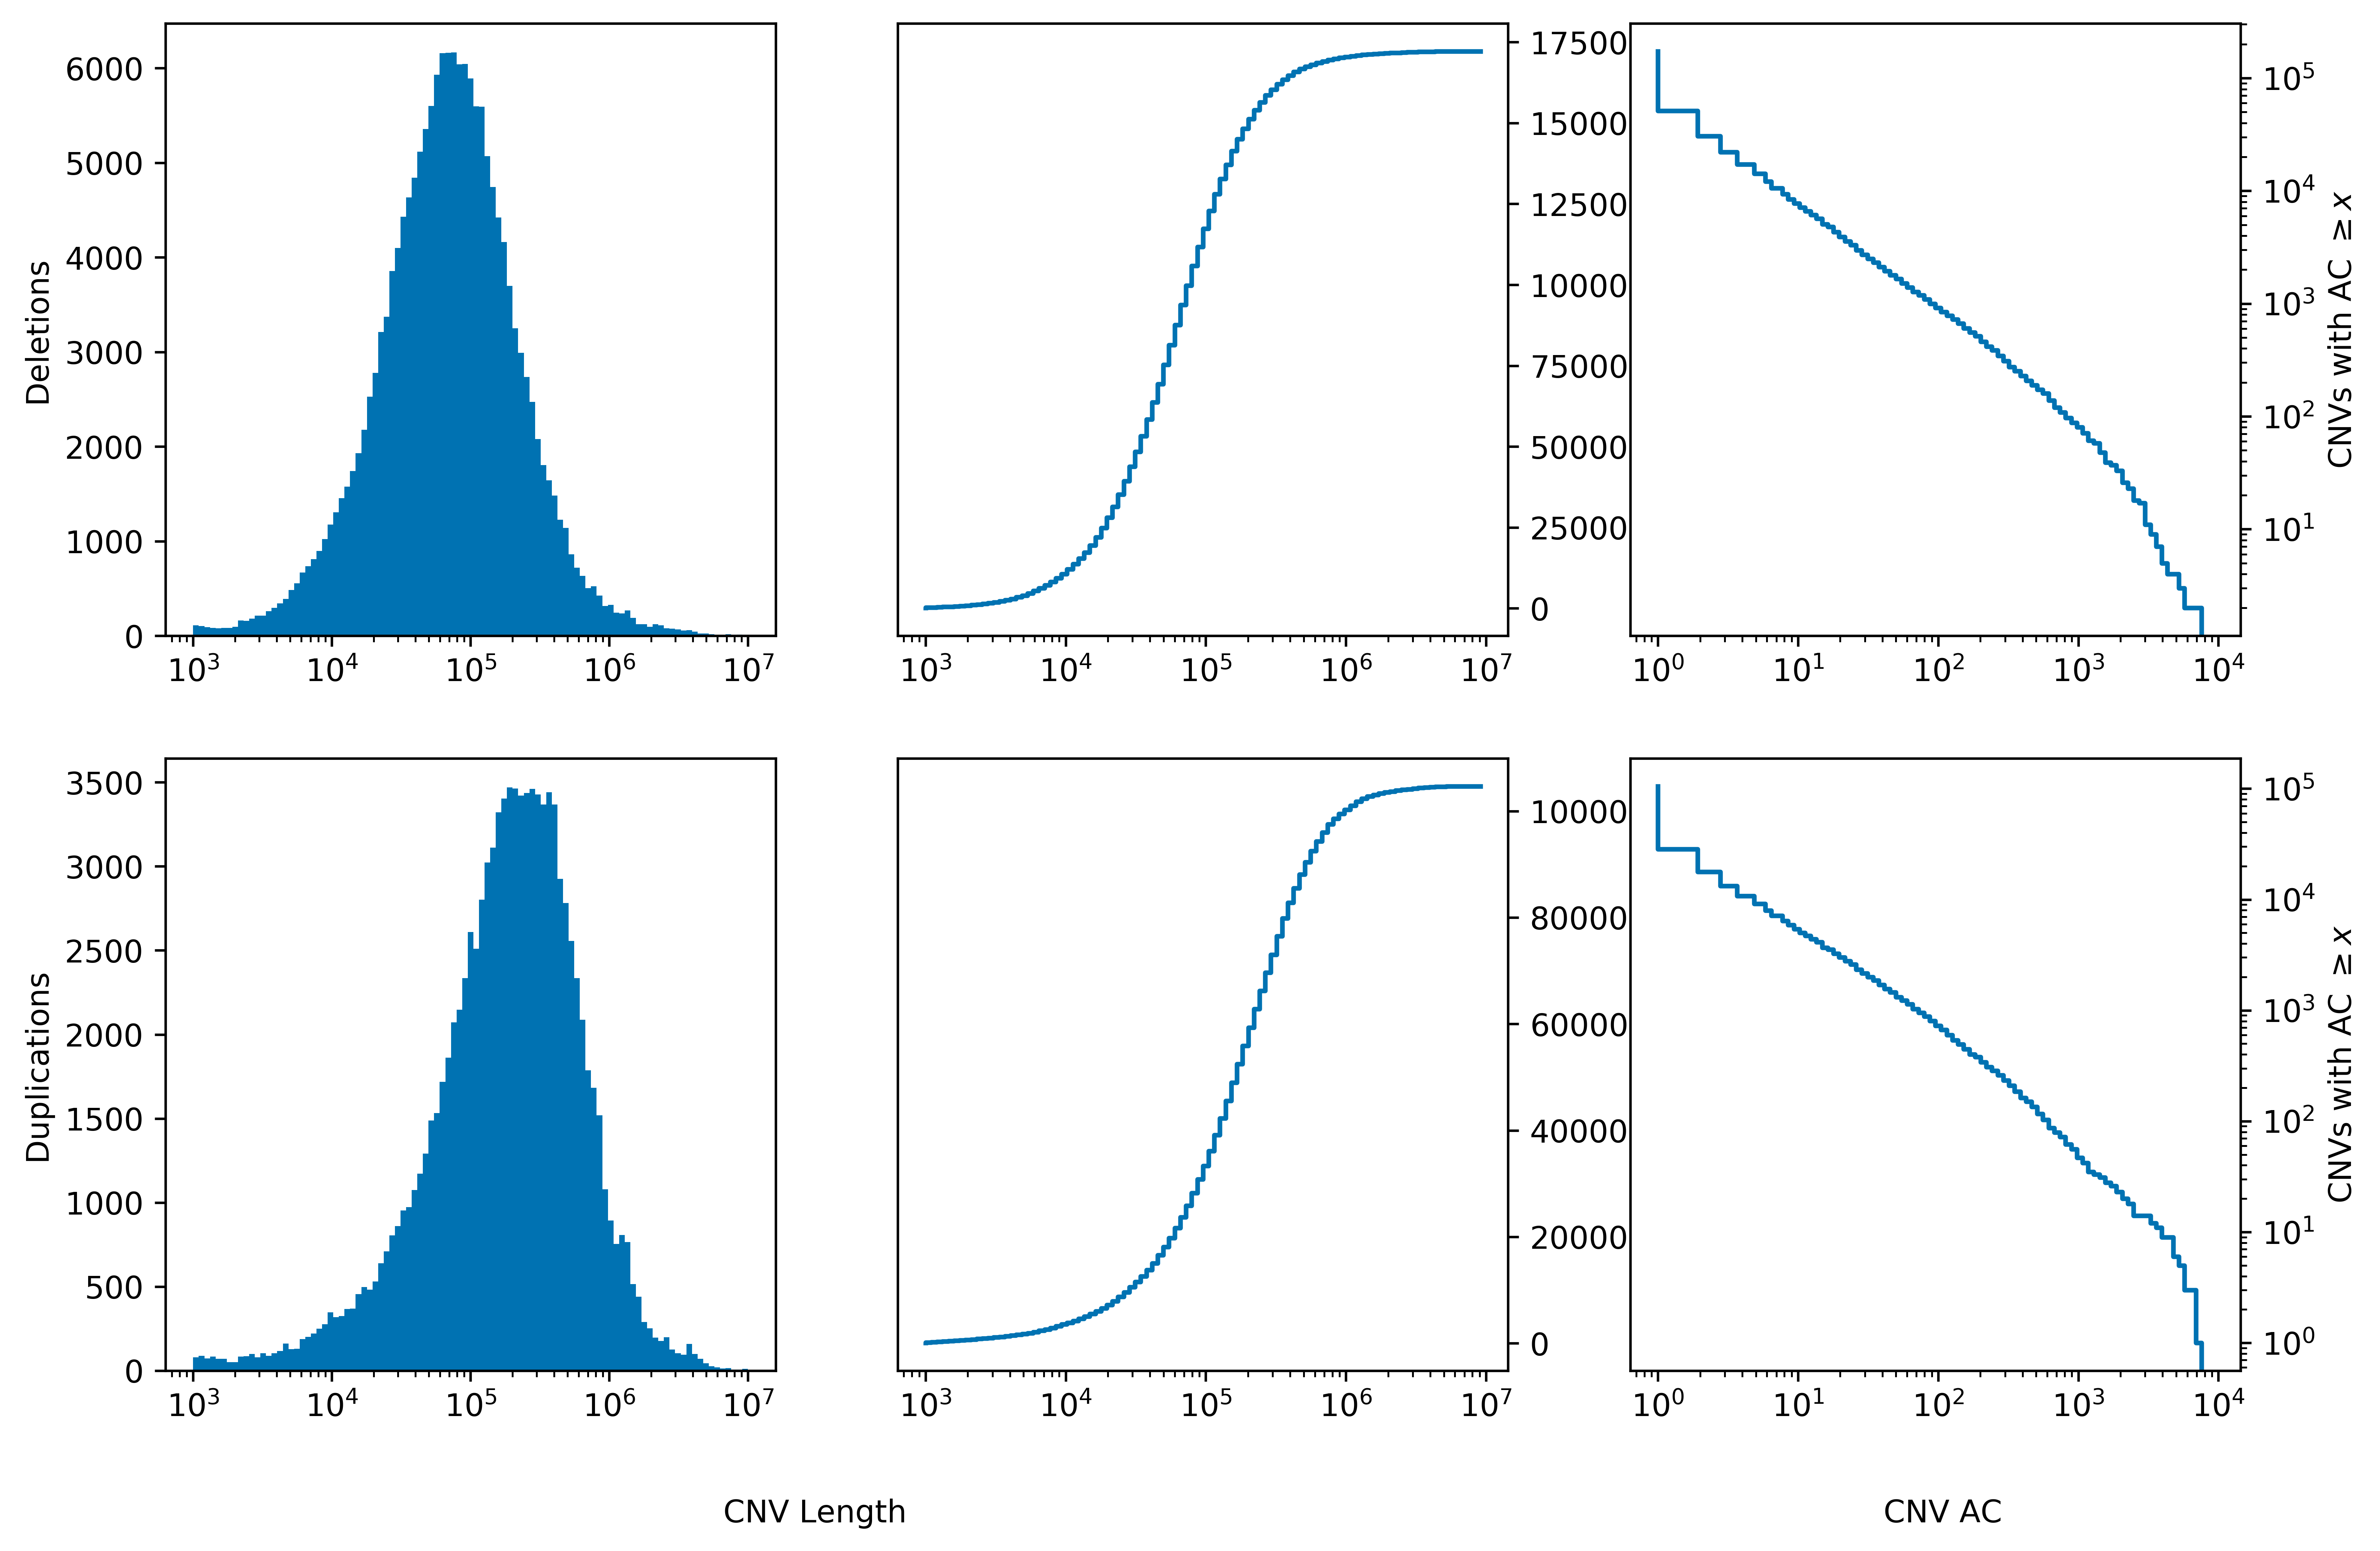

In [6]:
# Supplement: CNV length stratified by deletion (above), or insertion (below)
fig = plt.figure(figsize=(12,8), dpi=600)
fig.text(1/3.0, 0.04, 'CNV Length')
fig.text(4.6/6.0, 0.04, 'CNV AC')

for i,source in enumerate([ cnv_data.loc[cnv_data['TYPE'] < 2,:] , cnv_data.loc[cnv_data['TYPE'] > 2,:] ]): 
    plt.subplot(2,3,1 + (3*i))
    plt.hist(source['LEN'].values, bins=np.logspace(np.log10(1e3),np.log10(1e7), 100)) # 2kb to 5Mb
    plt.gca().set_xscale("log")
    plt.ylabel('Duplications' if i else 'Deletions')

    plt.subplot(2,3,2 + (3*i))
    values,bins = np.histogram(source['LEN'].values, bins=np.logspace(np.log10(1e3),np.log10(1e7), 100))
    plt.step(bins[:-1], np.cumsum(values)) # len <= x
    plt.gca().set_xscale("log")
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")
    plt.ylabel('CNVs with length $\leq x$')

    plt.subplot(2,3,3 + (3*i))
    values,bins = np.histogram(source['AC'].values, bins=np.logspace(np.log10(1e0),np.log10(1e4), 100))
    plt.step(bins[:-1], np.cumsum(values[::-1])[::-1]) # len <= x
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    plt.gca().yaxis.tick_right()
    plt.gca().yaxis.set_label_position("right")
    plt.ylabel('CNVs with AC $\geq x$')
plt.show()

In [7]:
markers = pd.read_table('/oak/stanford/groups/mrivas/private_data/ukbb/24983/cal/pgen/ukb24983_cal_cALL_v2.bim',
                        header=None, names=['CHR','ID','0','POS','REF','ALT'])
markers.head()

/home/users/magu/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CHR,ID,0,POS,REF,ALT
0,1,rs28659788,0,723307,G,C
1,1,rs116587930,0,727841,A,G
2,1,rs116720794,0,729632,T,C
3,1,rs3131972,0,752721,G,A
4,1,rs12184325,0,754105,T,C


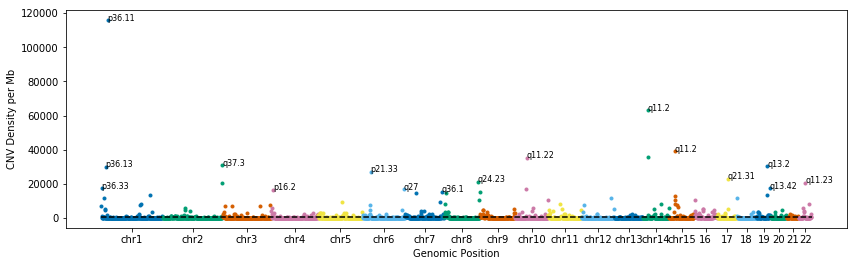

In [8]:
# plot CNV density per megabase, weighted by allele count -- Figure S1
plt.figure(figsize=(14,4))
binsize = 1e6 # 1 Mb

counts_by_bin = []
counts_by_chr = []
for c in range(1,23):
    bin_ix = 0
    while bin_ix * binsize < chrsize[str(c)]:
        counts_by_bin.append(data[(data['CHR'] == c) & 
                                  (data['BP2'] > (bin_ix * binsize)) & 
                                  (data['BP1'] < ((bin_ix + 1)*binsize))].shape[0])
        bin_ix += 1
    counts_by_chr.append(bin_ix)

chr_ixs = np.cumsum([0]+counts_by_chr)
# plot the points
for c in range(22):
    plt.plot(list(range(chr_ixs[c], chr_ixs[c+1])), counts_by_bin[chr_ixs[c]:chr_ixs[c+1]], '.')
plt.plot([0, chr_ixs[-1]],[data.shape[0]/chr_ixs[-1], data.shape[0]/chr_ixs[-1]], 'k--')

plt.xticks([chr_ixs[c] + (chr_ixs[c+1]-chr_ixs[c])/2 for c in range(len(counts_by_chr))],
           ['chr{}'.format(c+1) if c < 15 else str(c+1) for c in range(len(counts_by_chr))])
plt.xlabel('Genomic Position'), plt.ylabel('CNV Density per Mb')

for n in range(len(bin_to_band)):
    if counts_by_bin[n] > 15000 and all([counts_by_bin[n] >= counts_by_bin[i] for i in range(n-2,n+3)]): 
        plt.annotate(bin_to_band[n], [n, counts_by_bin[n]], fontsize=8)

plt.savefig('supplement/Figure-S1.pdf')
plt.show()

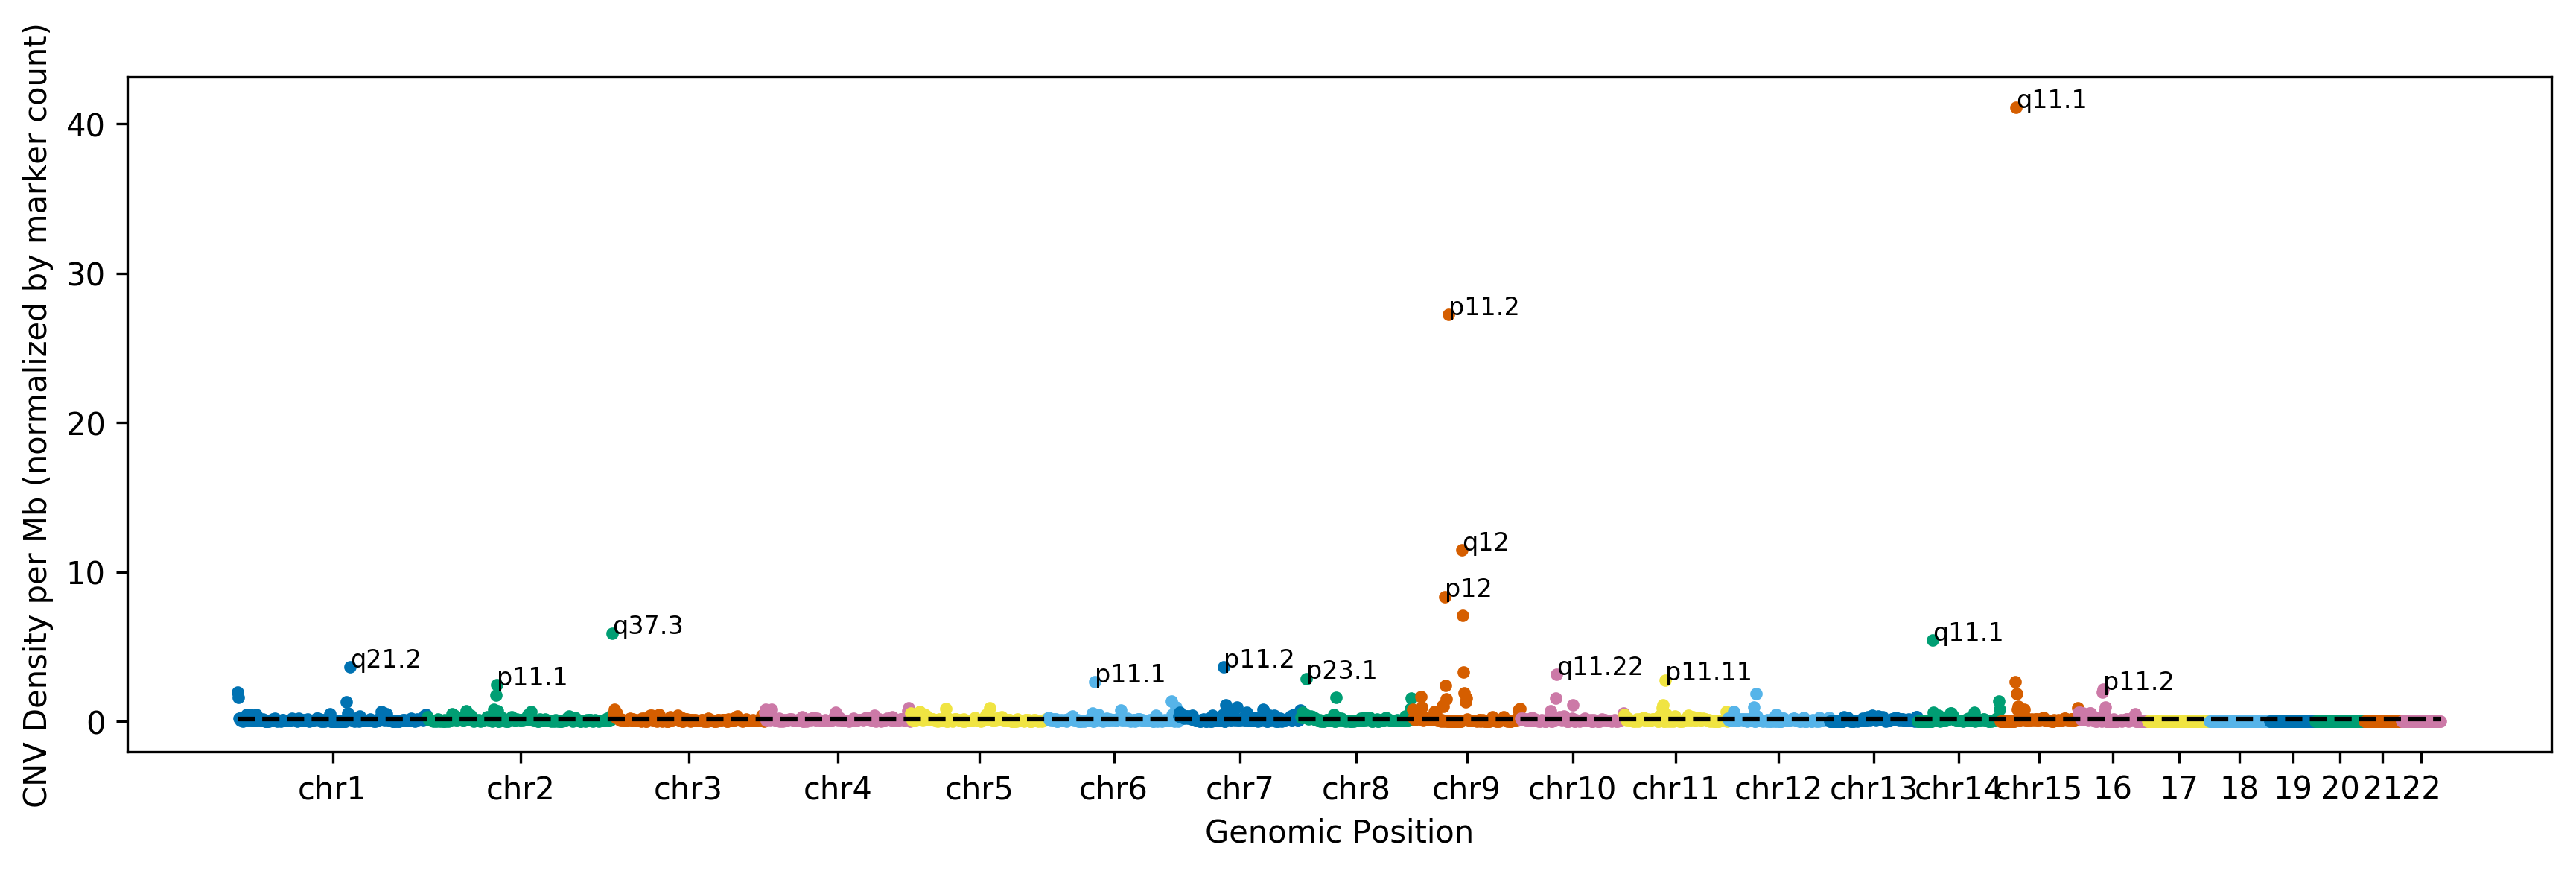

In [9]:
# plot CNV density normalized by marker density -- Figure S2
plt.figure(figsize=(14,4), dpi=300)
counts_by_bin = []
counts_by_chr = []
for c in range(1,23):
    bin_ix = 0
    while bin_ix * binsize < chrsize[str(c)]:
        count = cnv_data[(cnv_data['CHR'] == c) & 
                         (cnv_data['BP2'] > (bin_ix * binsize)) & 
                         (cnv_data['BP1'] < ((bin_ix + 1)*binsize))].shape[0]
        mark  = markers[(markers['CHR'] == c) & 
                        (markers['POS'] < (bin_ix + 1)*binsize) & 
                        (markers['POS'] > bin_ix * binsize)].shape[0]
        counts_by_bin.append(count/float(mark) if mark != 0 else 0)
        bin_ix += 1
    counts_by_chr.append(bin_ix)
counts_by_bin = [i/np.std(counts_by_bin) for i in counts_by_bin]
    
chr_ixs = np.cumsum([0]+counts_by_chr)
# plot the points
for c in range(22):
    plt.plot(list(range(chr_ixs[c], chr_ixs[c+1])), counts_by_bin[chr_ixs[c]:chr_ixs[c+1]], '.')
plt.plot([0, chr_ixs[-1]],[np.mean(counts_by_bin), np.mean(counts_by_bin)], 'k--')

plt.xticks([chr_ixs[c] + (chr_ixs[c+1]-chr_ixs[c])/2 for c in range(len(counts_by_chr))],
           ['chr{}'.format(c+1) if c < 15 else str(c+1) for c in range(len(counts_by_chr))])
plt.xlabel('Genomic Position'), plt.ylabel('CNV Density per Mb (normalized by marker count)')

for n in range(len(bin_to_band)):
    if counts_by_bin[n] > 2 and all([counts_by_bin[n] >= counts_by_bin[i] for i in range(n-2,n+3)]): 
        plt.annotate(bin_to_band[n], [n, counts_by_bin[n]], fontsize=8)

plt.savefig('supplement/Figure-S2.pdf')
plt.show()

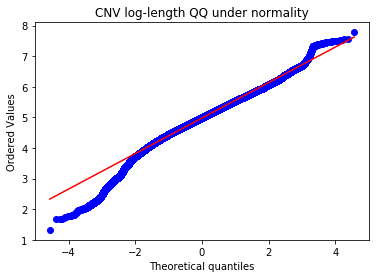

In [10]:
ax = plt.subplot()
probplot(np.log10(cnv_data['LEN'].values), dist=norm, plot=ax)
plt.title('CNV log-length QQ under normality')
plt.show()

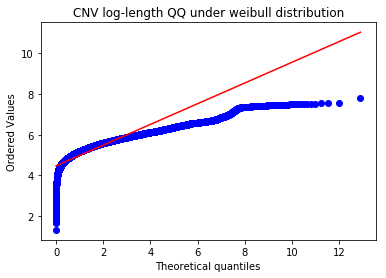

In [11]:
ax = plt.subplot()
probplot(np.log10(cnv_data['LEN'].values), dist=expon, plot=ax)
plt.title('CNV log-length QQ under weibull distribution')
plt.show()

In [12]:
cnv_nbp = pd.read_table('../../../cnv_ukb/resources/ukb15860_cnv_burden.covar', 
                        usecols=['IID', 'N_CNV', 'LEN_CNV'], index_col='IID')
cnv_nbp.rename_axis({'N_CNV':'N', 'LEN_CNV':'BP'}, axis=1, inplace=True)
cnv_nbp.head()

,N,BP
IID,,
1000014,4,797459
1000023,1,30701
1000030,1,74032
1000041,1,267190
1000059,2,83087


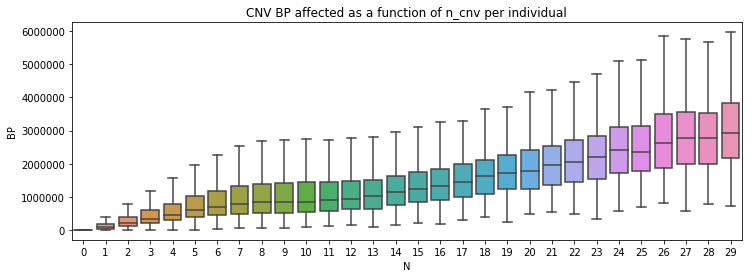

In [13]:
plt.figure(figsize=(12,4))
sns.boxplot(x='N', y='BP', data=cnv_nbp.query('N < 30'), showfliers=False)
plt.title('CNV BP affected as a function of n_cnv per individual')
plt.show()

In [14]:
data.iloc[(-data['LEN']).argsort()[:500],:].loc[:,'TYPE'].value_counts()

3    386
1    114
Name: TYPE, dtype: int64

In [15]:
data['TYPE'].value_counts()

1    907737
3    612424
4     10173
0      4070
Name: TYPE, dtype: int64

In [16]:
cnv_data['TYPE'].value_counts()

1    171861
3    102919
4      2467
0      1208
Name: TYPE, dtype: int64

In [17]:
data.shape

(1534404, 10)

In [18]:
cnv_data.shape

(278455, 9)

In [19]:
len(set(data['IID'].tolist())) + 32764

472228

In [20]:
1 - 32764.0/472228

0.930618260670693

In [21]:
len(set(data['IID'].tolist()))

439464

In [22]:
np.median(data['IID'].value_counts().tolist()) # + [0 for _ in range(32764)])

3.0

In [23]:
np.median(cnvBP.values()) # + [0 for _ in range(32764)])

99923.5